In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tqdm import tqdm
# Remplacez 'chemin/vers/votre/projet/module' par le chemin absolu réel vers le dossier "module" via la commande pwd
module_path = '/Users/eliotsouthon/Desktop/POC/POC/Code/Modules'  
sys.path.append(module_path)
import ma_bibliotheque 

In [2]:
csv_file_paths=ma_bibliotheque.path_data('/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver')
# Affiche la liste des chemins pour vérifier
print("Liste des chemins des fichiers CSV :")
for path in csv_file_paths:
    print(path)

Liste des chemins des fichiers CSV :
/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver/weather_1_51.csv
/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver/e_w_1_51.csv
/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver/energy_1_51.csv


In [3]:
df=pd.read_csv(csv_file_paths[1], sep=';')
df.head()

,Date,Consommation brute électricité (MW) - RTE,T,U,FF
0,2013-02-01 17:00:00+00:00,6894.5,1.9,85.0,1.2
1,2013-02-01 18:00:00+00:00,6855.0,0.0,91.0,0.0
2,2013-02-01 19:00:00+00:00,6484.0,-0.6,96.0,1.2
3,2013-02-01 20:00:00+00:00,6117.5,-1.7,95.0,0.0
4,2013-02-01 21:00:00+00:00,6016.5,-1.1,97.0,0.9


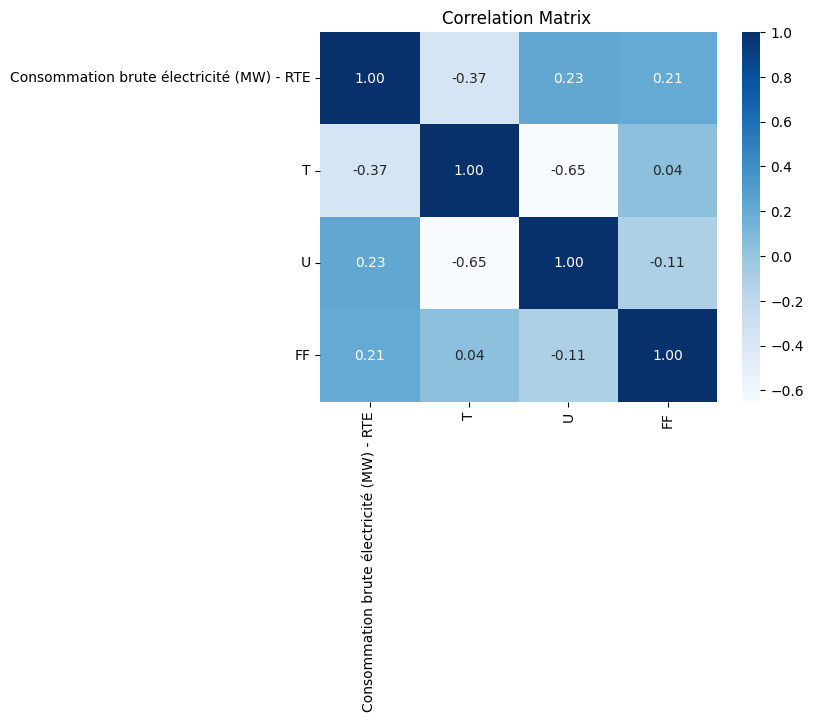

In [4]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])


plt.figure()
sns.heatmap(df_numeric.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlation Matrix ')

plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

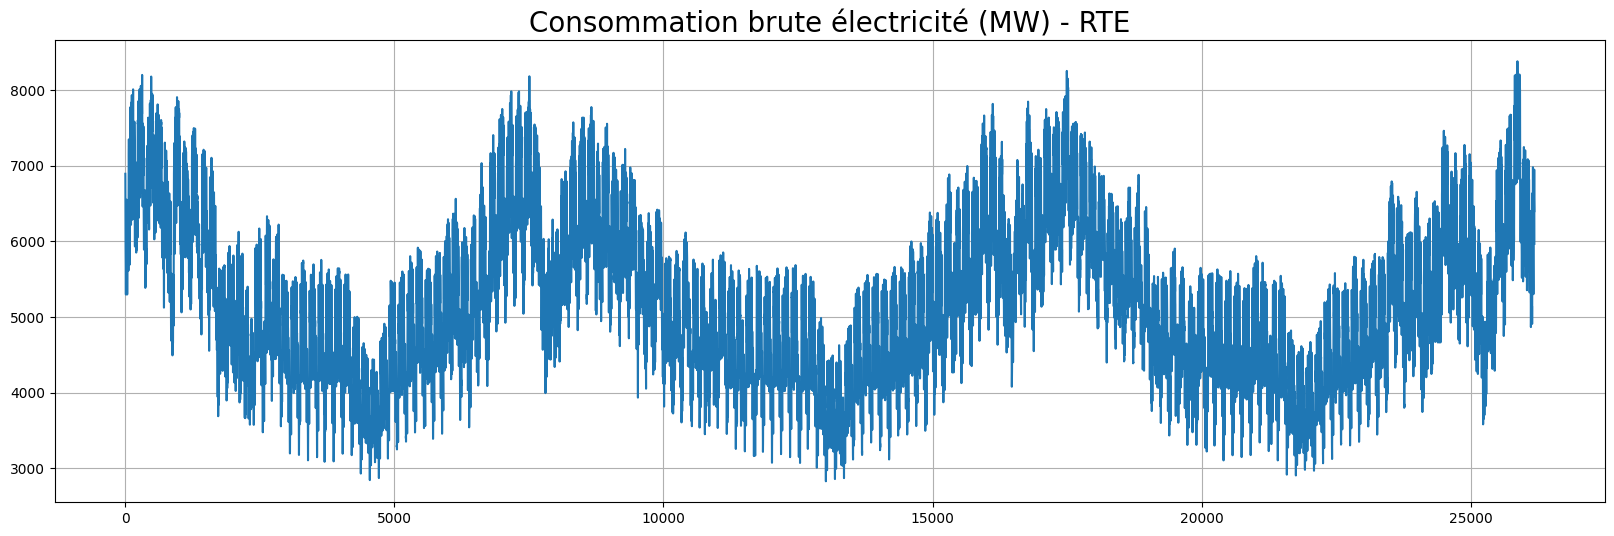

 25%|██▌       | 1/4 [00:00<00:00,  5.57it/s]

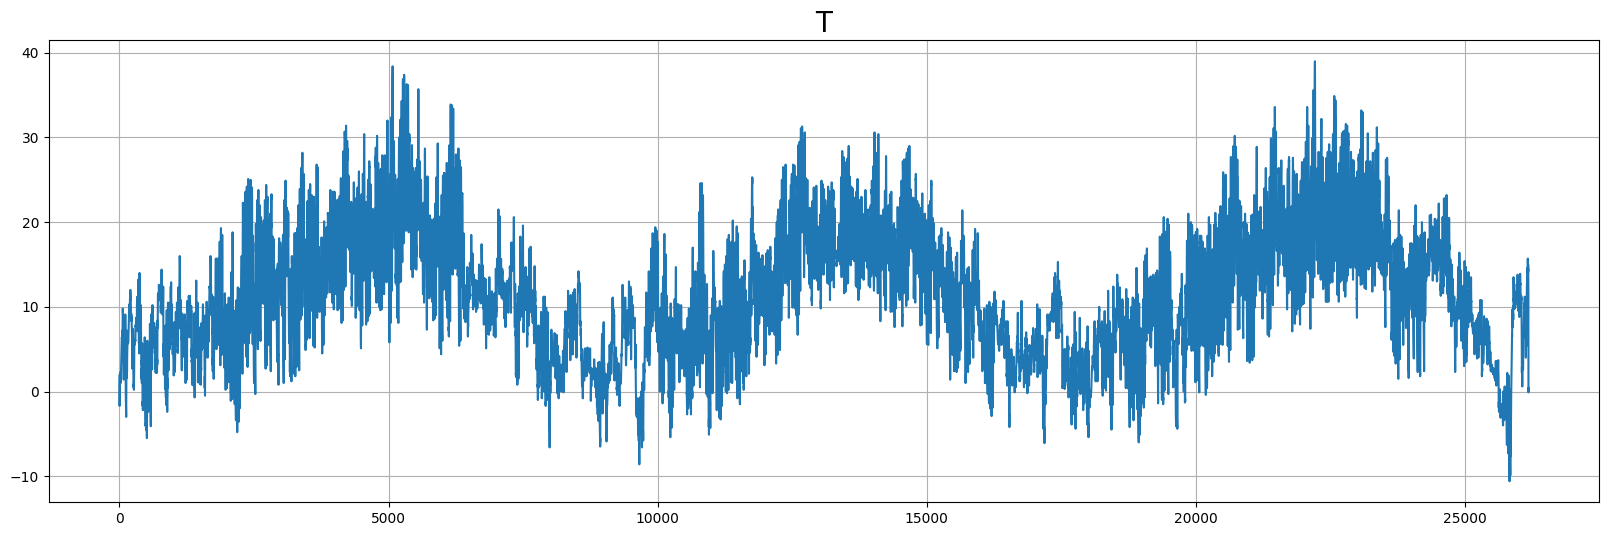

 50%|█████     | 2/4 [00:00<00:00,  7.03it/s]

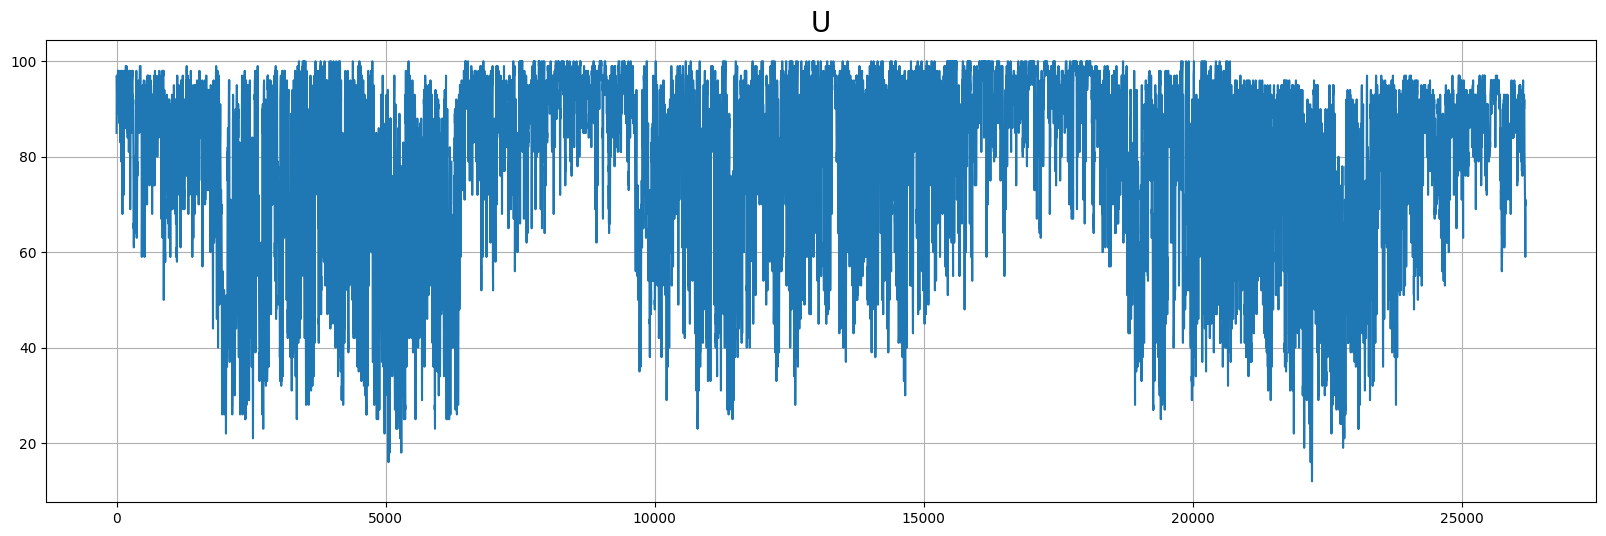

 75%|███████▌  | 3/4 [00:00<00:00,  7.31it/s]

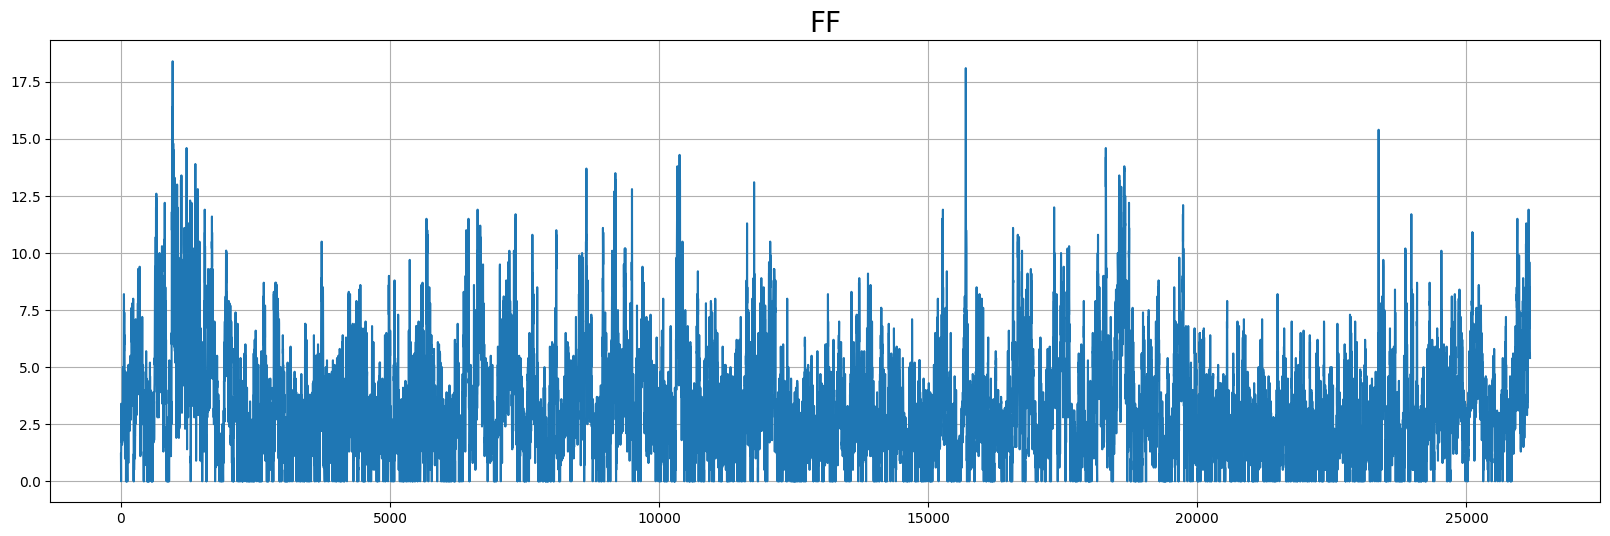

100%|██████████| 4/4 [00:00<00:00,  7.12it/s]


In [5]:
for k in tqdm(range(len(df_numeric.columns))):
    fig = plt.figure(figsize=(20, 6))
    ax = fig.add_subplot(111)
    colonne=df_numeric.iloc[:,k]
    colonne.plot(ax=ax)
    plt.title(df_numeric.columns[k], fontsize=20)
    plt.grid(True)

    plt.show()

In [6]:
ma_bibliotheque.check_completeness(df)

Analyse des valeurs manquantes par colonne :
 Date                                         0
Consommation brute électricité (MW) - RTE    0
T                                            0
U                                            0
FF                                           0
dtype: int64

Nombre total de lignes: 26183

Lignes contenant des valeurs manquantes: 0

Le DataFrame est complet (aucune valeur manquante).
